### Imports

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split


C:\Users\tarar\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\tarar\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\tarar\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### Configuration

In [5]:
EXPERIMENT = "tara"
MODE = "test"
ACTIVITIES = ["relaxing", "eating", "walking", "studying"]

### Dataset

In [7]:
dataset: pd.DataFrame = pd.read_csv(f"state/{EXPERIMENT}_{MODE}_interpolated.csv")
dataset

,accel_z,accel_y,accel_x,gyro_z,gyro_y,gyro_x,gravity_z,gravity_y,gravity_x,ori_qz,...,bar_relativeAltitude,bar_pressure,gps_altitude,gps_latitude,gps_longitude,time,walking,relaxing,eating,studying
0,-0.023840,0.018390,0.008858,-0.054503,-0.005479,0.011691,-7.563114,-5.831582,-2.216261,0.663099,...,0.015858,1018.030701,40.507936,52.047900,4.382954,2023-06-16 15:39:53.073135400,1,0,0,0
1,0.002951,0.022089,-0.041490,-0.070068,0.088273,-0.000520,-7.004715,-6.675822,-1.343320,0.653123,...,0.026424,1018.029251,40.643834,52.047898,4.382956,2023-06-16 15:39:54.073135400,1,0,0,0
2,0.083199,-0.117540,0.250466,0.099236,-0.050622,-0.041580,-7.546371,-6.011996,-1.740925,0.642579,...,0.022198,1018.027916,40.755786,52.047895,4.382956,2023-06-16 15:39:55.073135400,1,0,0,0
3,-0.024142,-0.041310,-0.124078,0.268303,0.292325,0.254841,-7.262949,-6.160909,-2.257083,0.731410,...,0.065531,1018.026657,40.815552,52.047892,4.382956,2023-06-16 15:39:56.073135400,1,0,0,0
4,-0.343633,0.325876,0.097991,-0.121707,-0.284418,-0.060837,-6.545389,-6.867339,-2.387059,0.749090,...,0.122605,1018.028030,40.865129,52.047893,4.382956,2023-06-16 15:39:57.073135400,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3540,-0.027468,-0.002052,-0.012776,0.062467,0.000044,-0.000010,-9.806233,0.083322,0.035022,-0.157359,...,5.814162,1017.307434,41.526821,52.045305,4.384527,2023-06-16 16:38:53.073135400,0,0,0,1
3541,-0.029051,0.008580,0.018632,0.031754,-0.000316,-0.000033,-9.806149,0.079065,0.040456,-0.117536,...,6.261243,1017.307434,41.526821,52.045305,4.384527,2023-06-16 16:38:54.073135400,0,0,0,1
3542,-0.028269,0.002606,0.002662,-0.000234,-0.000159,0.000208,-9.806189,0.082902,0.039185,-0.113216,...,6.271812,1017.306366,41.526821,52.045305,4.384527,2023-06-16 16:38:55.073135400,0,0,0,1
3543,-0.028832,0.002296,0.002630,0.023920,0.000002,-0.000178,-9.806191,0.083961,0.039061,-0.108622,...,6.271812,1017.298370,41.526821,52.045305,4.384527,2023-06-16 16:38:56.073135400,0,0,0,1


## PCA

In [8]:
from book.Chapter3.DataTransformation import PrincipalComponentAnalysis

pca = PrincipalComponentAnalysis().apply_pca(dataset, dataset.columns[:-5],len(dataset.columns[:-5]))
dataset = pca


## Feature engineering part 1: rolling mean/median/std/max/min/slope

In [9]:
window_sizes = [5, 10, 15, 20, 25, 30]

columns_to_featurize = [
    'accel_z', 'accel_y', 'accel_x',
    'gyro_z', 'gyro_y', 'gyro_x',
    'gravity_z', 'gravity_y', 'gravity_x',
    'ori_qz', 'ori_qy', 'ori_qx', 'ori_qw',
    'magne_z', 'magne_y', 'magne_x',
    'bar_relativeAltitude', 'bar_pressure',
    'gps_altitude', 'gps_latitude', 'gps_longitude'
]

# Exclude time and label columns
for column in dataset[columns_to_featurize]:
    for window_size in window_sizes:
        rolling_mean = dataset[column].rolling(window_size).mean()
        rolling_median = dataset[column].rolling(window_size).median()
        rolling_std = dataset[column].rolling(window_size).std()
        rolling_max = dataset[column].rolling(window_size).max()
        rolling_min = dataset[column].rolling(window_size).min()

        new_column_mean_name = f"{column}_rolling_mean_{window_size}"
        new_column_median_name = f"{column}_rolling_median_{window_size}"
        new_column_std_name = f"{column}_rolling_std_{window_size}"
        new_column_max_name = f"{column}_rolling_max_{window_size}"
        new_column_min_name = f"{column}_rolling_min_{window_size}"

        dataset[new_column_mean_name] = rolling_mean
        dataset[new_column_median_name] = rolling_median
        dataset[new_column_std_name] = rolling_std
        dataset[new_column_max_name] = rolling_max
        dataset[new_column_min_name] = rolling_min

dataset

C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_std_name] = rolling_std
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_max_name] = rolling_max
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_max_name] = rolling_max
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_min_name] = rolling_min
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_min_name] = rolling_min
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_mean_name] = rolling_mean
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_std_name] = rolling_std
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_max_name] = rolling_max
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_min_name] = rolling_min
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_mean_name] = rolling_mean
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_median_name] = rolling_median
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_std_name] = rolling_std
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_min_name] = rolling_min
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_mean_name] = rolling_mean
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_max_name] = rolling_max
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_min_name] = rolling_min
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_std_name] = rolling_std
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_max_name] = rolling_max
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_min_name] = rolling_min
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_mean_name] = rolling_mean
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_median_name] = rolling_median
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_std_name] = rolling_std
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_mean_name] = rolling_mean
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_median_name] = rolling_median
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance

C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_median_name] = rolling_median
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_std_name] = rolling_std
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_min_name] = rolling_min
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_mean_name] = rolling_mean
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_min_name] = rolling_min
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_mean_name] = rolling_mean
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_min_name] = rolling_min
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_mean_name] = rolling_mean
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_max_name] = rolling_max
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_min_name] = rolling_min
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_min_name] = rolling_min
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_mean_name] = rolling_mean
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_max_name] = rolling_max
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_min_name] = rolling_min
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_median_name] = rolling_median
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_std_name] = rolling_std
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_median_name] = rolling_median
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_std_name] = rolling_std
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_min_name] = rolling_min
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_mean_name] = rolling_mean
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_max_name] = rolling_max
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_min_name] = rolling_min
C:\Users\tarar\AppData\Local\Temp\ipykernel_16224\3131833217.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

,accel_z,accel_y,accel_x,gyro_z,gyro_y,gyro_x,gravity_z,gravity_y,gravity_x,ori_qz,...,gps_longitude_rolling_mean_25,gps_longitude_rolling_median_25,gps_longitude_rolling_std_25,gps_longitude_rolling_max_25,gps_longitude_rolling_min_25,gps_longitude_rolling_mean_30,gps_longitude_rolling_median_30,gps_longitude_rolling_std_30,gps_longitude_rolling_max_30,gps_longitude_rolling_min_30
0,-0.023840,0.018390,0.008858,-0.054503,-0.005479,0.011691,-7.563114,-5.831582,-2.216261,0.663099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.002951,0.022089,-0.041490,-0.070068,0.088273,-0.000520,-7.004715,-6.675822,-1.343320,0.653123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.083199,-0.117540,0.250466,0.099236,-0.050622,-0.041580,-7.546371,-6.011996,-1.740925,0.642579,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.024142,-0.041310,-0.124078,0.268303,0.292325,0.254841,-7.262949,-6.160909,-2.257083,0.731410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.343633,0.325876,0.097991,-0.121707,-0.284418,-0.060837,-6.545389,-6.867339,-2.387059,0.749090,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3540,-0.027468,-0.002052,-0.012776,0.062467,0.000044,-0.000010,-9.806233,0.083322,0.035022,-0.157359,...,4.384527,4.384527,1.668716e-09,4.384527,4.384527,4.384527,4.384527,0.0,4.384527,4.384527
3541,-0.029051,0.008580,0.018632,0.031754,-0.000316,-0.000033,-9.806149,0.079065,0.040456,-0.117536,...,4.384527,4.384527,1.668716e-09,4.384527,4.384527,4.384527,4.384527,0.0,4.384527,4.384527
3542,-0.028269,0.002606,0.002662,-0.000234,-0.000159,0.000208,-9.806189,0.082902,0.039185,-0.113216,...,4.384527,4.384527,1.668716e-09,4.384527,4.384527,4.384527,4.384527,0.0,4.384527,4.384527
3543,-0.028832,0.002296,0.002630,0.023920,0.000002,-0.000178,-9.806191,0.083961,0.039061,-0.108622,...,4.384527,4.384527,1.668716e-09,4.384527,4.384527,4.384527,4.384527,0.0,4.384527,4.384527


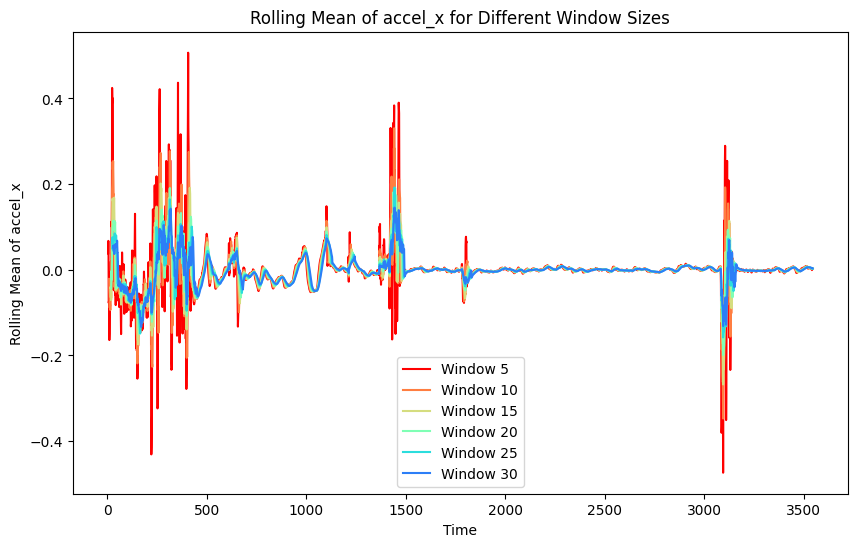

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming you have a DataFrame 'dataset' with columns for rolling mean values
# for different window sizes of 'accel_x'

# Selecting the relevant columns for plotting
window_sizes = [5, 10, 15, 20, 25, 30]
rolling_mean_cols = ['accel_x_rolling_mean_5', 'accel_x_rolling_mean_10', 'accel_x_rolling_mean_15',
                     'accel_x_rolling_mean_20', 'accel_x_rolling_mean_25', 'accel_x_rolling_mean_30']

# Plotting the line plot with rainbow colors
plt.figure(figsize=(10, 6))
colors = cm.rainbow_r([i / len(rolling_mean_cols) for i in range(len(rolling_mean_cols))])
for col, color in zip(rolling_mean_cols, colors):
    plt.plot(dataset.index, dataset[col], color=color, label=f'Window {col.split("_")[-1]}')

plt.xlabel('Time')
plt.ylabel('Rolling Mean of accel_x')
plt.title('Rolling Mean of accel_x for Different Window Sizes')
plt.legend()
plt.show()


## Fourier

In [27]:
import numpy as np

window_sizes = [5, 10, 15, 20, 25, 30]
num_fourier_features = 5

columns_to_featurize = [
    'accel_z', 'accel_y', 'accel_x',
    'gyro_z', 'gyro_y', 'gyro_x',
    'gravity_z', 'gravity_y', 'gravity_x',
    'ori_qz', 'ori_qy', 'ori_qx', 'ori_qw',
    'magne_z', 'magne_y', 'magne_x'
]

# Exclude time and label columns
for column in dataset[columns_to_featurize]:
    for window_size in window_sizes:
        rolling_mean = dataset[column].rolling(window_size).mean().fillna(0)
        new_column_mean_name = f"{column}_rolling_mean_{window_size}"
        dataset[new_column_mean_name] = rolling_mean
        
        data = rolling_mean.values
        
        # Compute FFT
        fft_result = np.fft.fft(data)
        
        # Mean Power Spectrum
        power_spectrum = np.abs(fft_result) ** 2
        new_column_power_name = f"{column}_power_window_{window_size}"
        dataset[new_column_power_name] = power_spectrum.mean()
        
        # Mean Amplitude Spectrum
        amplitude_spectrum = np.abs(fft_result)
        new_column_amplitude_name = f"{column}_amplitude_window_{window_size}"
        dataset[new_column_amplitude_name] = amplitude_spectrum.mean()
        
        # Total Power or Energy
        total_power = np.sum(power_spectrum)
        new_column_energy_name = f"{column}_total_power_{window_size}"
        dataset[new_column_energy_name] = total_power
        
        # Mean Frequency
        frequencies = np.fft.fftfreq(len(data))
        mean_frequency = np.sum(power_spectrum * frequencies) / total_power
        new_column_mean_freq_name = f"{column}_mean_frequency_{window_size}"
        dataset[new_column_mean_freq_name] = mean_frequency
dataset

/var/folders/_6/3cydh_512s94j8m3t47xggm00000gn/T/ipykernel_55528/4033790892.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_amplitude_name] = amplitude_spectrum.mean()
/var/folders/_6/3cydh_512s94j8m3t47xggm00000gn/T/ipykernel_55528/4033790892.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_energy_name] = total_power
/var/folders/_6/3cydh_512s94j8m3t47xggm00000gn/T/ipykernel_55528/4033790892.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of c

,accel_z,accel_y,accel_x,gyro_z,gyro_y,gyro_x,gravity_z,gravity_y,gravity_x,ori_qz,...,magne_x_mean_frequency_20,magne_x_power_window_25,magne_x_amplitude_window_25,magne_x_total_power_25,magne_x_mean_frequency_25,magne_x_rolling_mean_30,magne_x_power_window_30,magne_x_amplitude_window_30,magne_x_total_power_30,magne_x_mean_frequency_30
0,-0.023840,0.018390,0.008858,-0.054503,-0.005479,0.011691,-7.563114,-5.831582,-2.216261,0.663099,...,3.174798e-19,1.968014e+07,576.392053,6.976609e+10,0.0,0.000000,1.950993e+07,550.545342,6.916270e+10,1.077254e-19
1,0.002951,0.022089,-0.041490,-0.070068,0.088273,-0.000520,-7.004715,-6.675822,-1.343320,0.653123,...,3.174798e-19,1.968014e+07,576.392053,6.976609e+10,0.0,0.000000,1.950993e+07,550.545342,6.916270e+10,1.077254e-19
2,0.083199,-0.117540,0.250466,0.099236,-0.050622,-0.041580,-7.546371,-6.011996,-1.740925,0.642579,...,3.174798e-19,1.968014e+07,576.392053,6.976609e+10,0.0,0.000000,1.950993e+07,550.545342,6.916270e+10,1.077254e-19
3,-0.024142,-0.041310,-0.124078,0.268303,0.292325,0.254841,-7.262949,-6.160909,-2.257083,0.731410,...,3.174798e-19,1.968014e+07,576.392053,6.976609e+10,0.0,0.000000,1.950993e+07,550.545342,6.916270e+10,1.077254e-19
4,-0.343633,0.325876,0.097991,-0.121707,-0.284418,-0.060837,-6.545389,-6.867339,-2.387059,0.749090,...,3.174798e-19,1.968014e+07,576.392053,6.976609e+10,0.0,0.000000,1.950993e+07,550.545342,6.916270e+10,1.077254e-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3540,-0.027468,-0.002052,-0.012776,0.062467,0.000044,-0.000010,-9.806233,0.083322,0.035022,-0.157359,...,3.174798e-19,1.968014e+07,576.392053,6.976609e+10,0.0,21.043766,1.950993e+07,550.545342,6.916270e+10,1.077254e-19
3541,-0.029051,0.008580,0.018632,0.031754,-0.000316,-0.000033,-9.806149,0.079065,0.040456,-0.117536,...,3.174798e-19,1.968014e+07,576.392053,6.976609e+10,0.0,21.043013,1.950993e+07,550.545342,6.916270e+10,1.077254e-19
3542,-0.028269,0.002606,0.002662,-0.000234,-0.000159,0.000208,-9.806189,0.082902,0.039185,-0.113216,...,3.174798e-19,1.968014e+07,576.392053,6.976609e+10,0.0,21.046909,1.950993e+07,550.545342,6.916270e+10,1.077254e-19
3543,-0.028832,0.002296,0.002630,0.023920,0.000002,-0.000178,-9.806191,0.083961,0.039061,-0.108622,...,3.174798e-19,1.968014e+07,576.392053,6.976609e+10,0.0,21.053380,1.950993e+07,550.545342,6.916270e+10,1.077254e-19


In [30]:
len(dataset.columns)

972

## Forward Select

[0.980225988700565,
 0.9830508474576272,
 0.980225988700565,
 0.981638418079096,
 0.9788135593220338,
 0.9788135593220338,
 0.9788135593220338,
 0.9788135593220338,
 0.9774011299435028,
 0.9774011299435028,
 0.9774011299435028,
 0.9731638418079096,
 0.9703389830508474,
 0,
 0,
 0,
 0,
 0]

## Saving experiment state

In [185]:
from pathlib import Path

# saving the state for faster further experimentation
target_directory = "final_datasets"
Path(target_directory).mkdir(exist_ok=True, parents=True)
dataset.to_csv(f"{target_directory}/{EXPERIMENT}_{MODE}_features.csv", index=False)